<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Classification-model-in-cnn-2022__final-/blob/main/Fish_Image_Classification_My_Model02_test(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import numpy as np
from glob import glob
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
# re-size all the images to this
IMAGE_SIZE = [128,128]

train_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training'
valid_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation'

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,padding='same', strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                   
                                    
                                    tf.keras.layers.Conv2D(64,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                 

                                    tf.keras.layers.Conv2D(128,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   

                                    tf.keras.layers.Conv2D(256,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                  

                                    tf.keras.layers.Conv2D(512,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                                                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),                               

                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

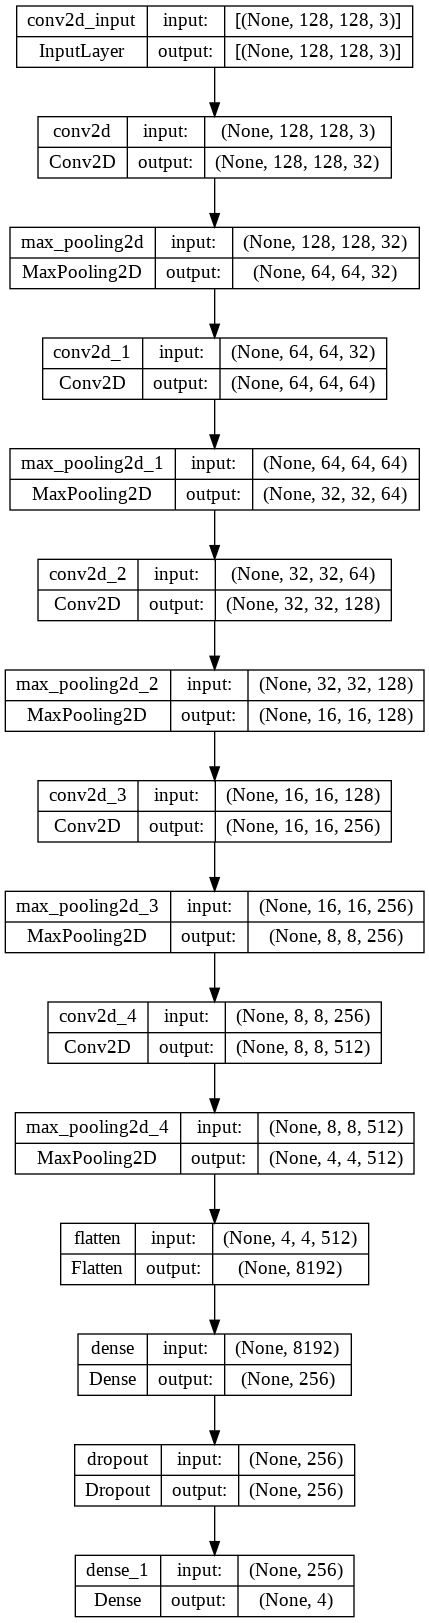

In [8]:
plot_model(model = model,show_shapes = True)

In [9]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part fourteen/my_model_02_test(2).h5')

In [10]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy',
              #optimizer = 'Adam',
              optimizer = opt,
              metrics = ['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [12]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part fourteen/my_model_02_test(2.1).hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 10,factor = 0.1)

In [13]:
hist = model.fit_generator(training_set, shuffle = True, epochs=30, validation_data=test_set,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2,
                          
                           )

<ipython-input-13-5e95e73b1bdb>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, shuffle = True, epochs=30, validation_data=test_set,


Epoch 1/30
150/150 - 3031s - loss: 1.0563 - accuracy: 0.4821 - val_loss: 1.4457 - val_accuracy: 0.4800 - lr: 1.0000e-04 - 3031s/epoch - 20s/step
Epoch 2/30
150/150 - 55s - loss: 0.7143 - accuracy: 0.7025 - val_loss: 0.9100 - val_accuracy: 0.6342 - lr: 1.0000e-04 - 55s/epoch - 370ms/step
Epoch 3/30
150/150 - 55s - loss: 0.5188 - accuracy: 0.8044 - val_loss: 0.5480 - val_accuracy: 0.7800 - lr: 1.0000e-04 - 55s/epoch - 363ms/step
Epoch 4/30
150/150 - 54s - loss: 0.3798 - accuracy: 0.8652 - val_loss: 0.5674 - val_accuracy: 0.7858 - lr: 1.0000e-04 - 54s/epoch - 357ms/step
Epoch 5/30
150/150 - 54s - loss: 0.2894 - accuracy: 0.8919 - val_loss: 0.4428 - val_accuracy: 0.8467 - lr: 1.0000e-04 - 54s/epoch - 363ms/step
Epoch 6/30
150/150 - 55s - loss: 0.2800 - accuracy: 0.8946 - val_loss: 0.4997 - val_accuracy: 0.8233 - lr: 1.0000e-04 - 55s/epoch - 366ms/step
Epoch 7/30
150/150 - 54s - loss: 0.2321 - accuracy: 0.9137 - val_loss: 0.4077 - val_accuracy: 0.8100 - lr: 1.0000e-04 - 54s/epoch - 361ms/st

In [14]:
acc = model.evaluate(test_set,steps = len(test_set),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 10s - loss: 0.0658 - accuracy: 0.9742 - 10s/epoch - 265ms/step
97.42


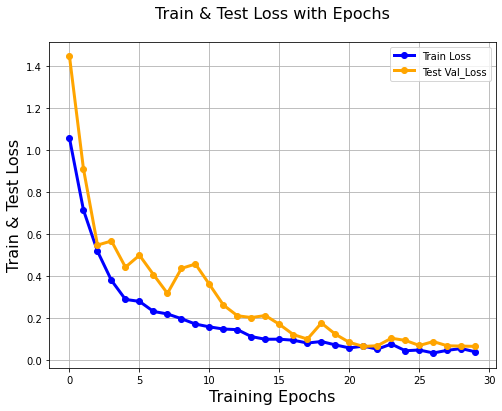

In [16]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,30)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

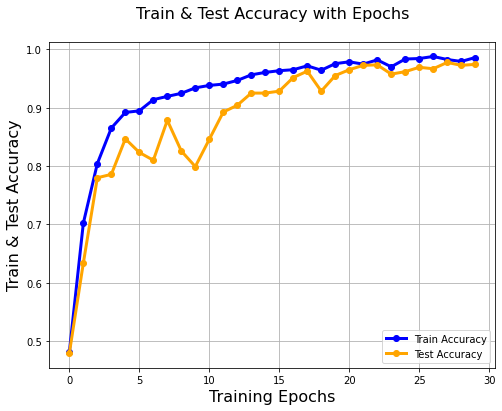

In [17]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [18]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 004.png', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 259ms/step
[[0. 0. 0. 1.]]
[3, 1, 2, 0]
Tilapia_Fish : 100.0 %
Hilsha_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Barbel_Fish : 0.0 %


In [24]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Barbel_Fish/Barbel_Fish 006.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 18ms/step
[[1. 0. 0. 0.]]
[0, 1, 2, 3]
Barbel_Fish : 100.0 %
Hilsha_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Tilapia_Fish : 0.0 %


In [20]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Spotted_Snakehead_Fish/Spotted_Fish 005.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 15ms/step
[[0. 0. 1. 0.]]
[2, 1, 0, 3]
Spotted_Snakehead_Fish : 100.0 %
Hilsha_Fish : 0.0 %
Barbel_Fish : 0.0 %
Tilapia_Fish : 0.0 %


In [21]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Hilsha_Fish/Hilsha_Fish 049.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0.]]
[1, 0, 2, 3]
Hilsha_Fish : 100.0 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Tilapia_Fish : 0.0 %


In [23]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/hilsha3.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 18ms/step
[[0. 1. 0. 0.]]
[1, 0, 2, 3]
Hilsha_Fish : 100.0 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Tilapia_Fish : 0.0 %
